In [64]:
#import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#load the ipl dataset
ipl = pd.read_csv('matches.csv')

In [5]:
# glance at the dataset
ipl.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
# number of rows and columns in the dataset
ipl.shape

(1095, 20)

In [8]:
# Frequency of most man of the match awards
ipl['player_of_match'].value_counts()

player_of_match
AB de Villiers       25
CH Gayle             22
RG Sharma            19
DA Warner            18
V Kohli              18
                     ..
NV Ojha               1
KV Sharma             1
Washington Sundar     1
PD Collingwood        1
Shahbaz Ahmed         1
Name: count, Length: 291, dtype: int64

In [11]:
# Get top 10 players of man of the match awards
ipl['player_of_match'].value_counts()[0:10]

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
Name: count, dtype: int64

In [14]:
# Get top 5 man of the match awards
ipl['player_of_match'].value_counts()[0:5]

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
Name: count, dtype: int64

### Create a bar graph of top 5 player of the match awards

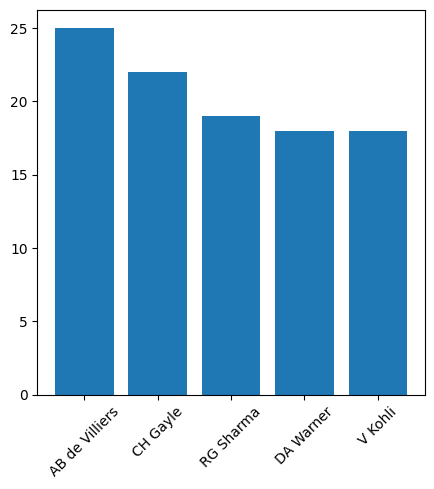

In [19]:
plt.figure(figsize=(5,5))
plt.bar(list(ipl['player_of_match'].value_counts()[0:5].keys()), ipl['player_of_match'].value_counts()[0:5])
plt.xticks(rotation=45)
plt.show()

### Try count plot of seaborn library, for selected players

<Axes: xlabel='player_of_match', ylabel='count'>

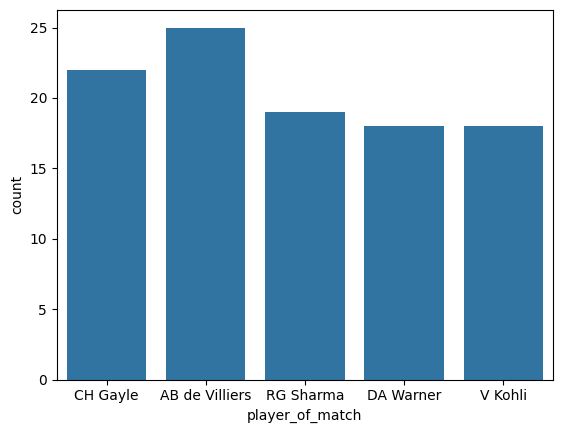

In [108]:
list_top_players = list(ipl['player_of_match'].value_counts().keys()[0:5])
selected_players = ipl[ipl['player_of_match'].isin(list_top_players)]
sns.countplot(data=selected_players, x='player_of_match')

In [27]:
# Frequency of result column
ipl['result'].value_counts()

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

In [29]:
# Frequency of toss winner with respect to each team
ipl['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [36]:
# Extract records where team won toss and bating first
batting_first = ipl[(ipl['result']== 'runs') & (ipl['toss_decision'] == 'bat') & (ipl['toss_winner'] == ipl['winner'])]

In [37]:
# getting first 5 rows
batting_first.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
14,335996,2007/08,Bangalore,2008-04-28,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,179.0,20.0,N,NaN,BR Doctrove,RB Tiffin
18,336000,2007/08,Jaipur,2008-05-01,League,SA Asnodkar,Sawai Mansingh Stadium,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,Rajasthan Royals,runs,45.0,197.0,20.0,N,NaN,RE Koertzen,GA Pratapkumar
20,336003,2007/08,Chandigarh,2008-05-03,League,IK Pathan,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,Kings XI Punjab,runs,9.0,179.0,20.0,N,NaN,DJ Harper,I Shivram
28,336010,2007/08,Kolkata,2008-05-08,League,SC Ganguly,Eden Gardens,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,5.0,130.0,16.0,N,NaN,Asad Rauf,IL Howell


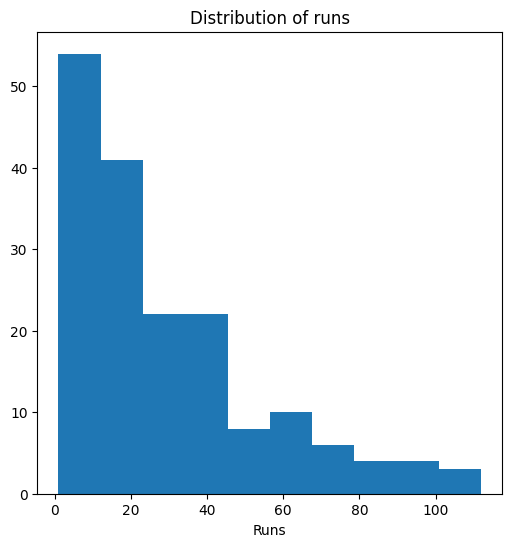

In [39]:
# Create a histogram of runs distribution
plt.figure(figsize=(6,6))
plt.hist(batting_first['result_margin'])
plt.title('Distribution of runs')
plt.xlabel('Runs')
plt.show()

In [40]:
# Finding out number of wins w.r.t each team after batting first
batting_first['winner'].value_counts()

winner
Chennai Super Kings            35
Mumbai Indians                 29
Kolkata Knight Riders          20
Rajasthan Royals               17
Royal Challengers Bangalore    16
Sunrisers Hyderabad            12
Deccan Chargers                11
Delhi Daredevils               11
Kings XI Punjab                 6
Delhi Capitals                  6
Lucknow Super Giants            4
Pune Warriors                   3
Gujarat Titans                  3
Royal Challengers Bengaluru     1
Name: count, dtype: int64

In [41]:
# Making a bar plot of top 3 teams with most wins after batting first
batting_first['winner'].value_counts()[0:3]

winner
Chennai Super Kings      35
Mumbai Indians           29
Kolkata Knight Riders    20
Name: count, dtype: int64

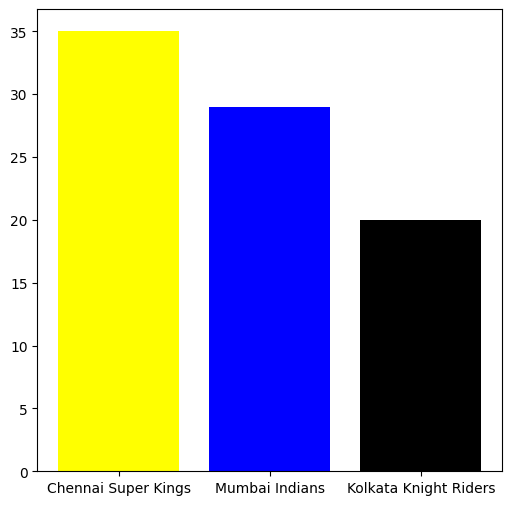

In [44]:
# Making a bar plot of the top 3 teams with most wins after batting first
plt.figure(figsize=(6,6))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()), list(batting_first['winner'].value_counts()[0:3]), color=['yellow','blue','black'])
plt.show()

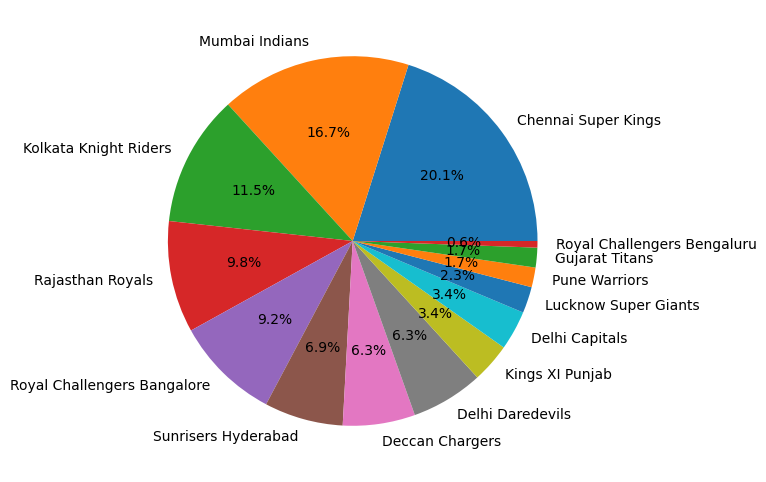

In [48]:
# Make a pie chart of the winners
plt.figure(figsize=(6,6))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [51]:
# Get records where team won after batting second, means chose to field first
batting_second = ipl[(ipl['toss_decision']=='field') & (ipl['toss_winner'] == ipl['winner']) & (ipl['result']=='wickets')]

In [52]:
batting_second.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
10,335992,2007/08,Bangalore,2008-04-26,League,SR Watson,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,136.0,20.0,N,NaN,MR Benson,IL Howell
12,335994,2007/08,Mumbai,2008-04-27,League,AC Gilchrist,Dr DY Patil Sports Academy,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,wickets,10.0,155.0,20.0,N,NaN,Asad Rauf,SL Shastri
17,335999,2007/08,Hyderabad,2008-05-01,League,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,165.0,20.0,N,NaN,BR Doctrove,RB Tiffin
24,336006,2007/08,Bangalore,2008-05-05,League,S Sreesanth,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,127.0,20.0,N,NaN,SJ Davis,BR Doctrove


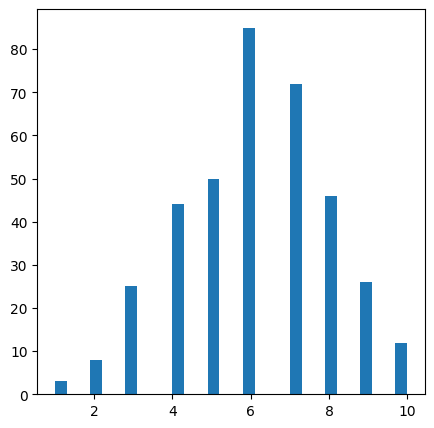

In [61]:
# Make a historgram of wickets, result=wickets, result_margin
plt.figure(figsize=(5,5))
plt.hist(batting_second['result_margin'], bins=30)
plt.show()

In [54]:
# Frequency of number of wins of each team, after batting second
batting_second['winner'].value_counts()

winner
Mumbai Indians                 48
Kolkata Knight Riders          47
Rajasthan Royals               42
Royal Challengers Bangalore    40
Chennai Super Kings            40
Kings XI Punjab                29
Sunrisers Hyderabad            26
Delhi Daredevils               24
Delhi Capitals                 18
Gujarat Titans                 11
Gujarat Lions                  10
Punjab Kings                    9
Deccan Chargers                 8
Lucknow Super Giants            6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Royal Challengers Bengaluru     3
Rising Pune Supergiants         1
Name: count, dtype: int64

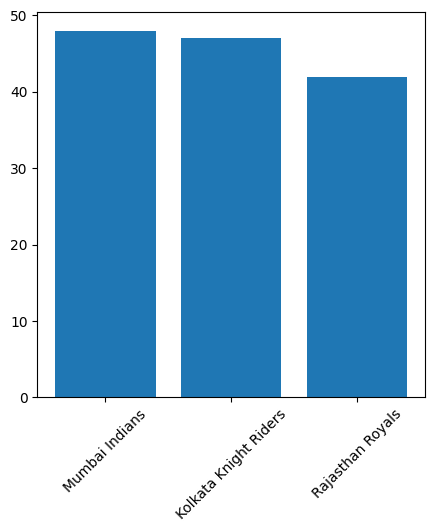

In [57]:
# Create a bar graph of top 3 teams with most wins after batting second
plt.figure(figsize=(5,5))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()), list(batting_second['winner'].value_counts()[0:3]))
plt.xticks(rotation=45)
plt.show()

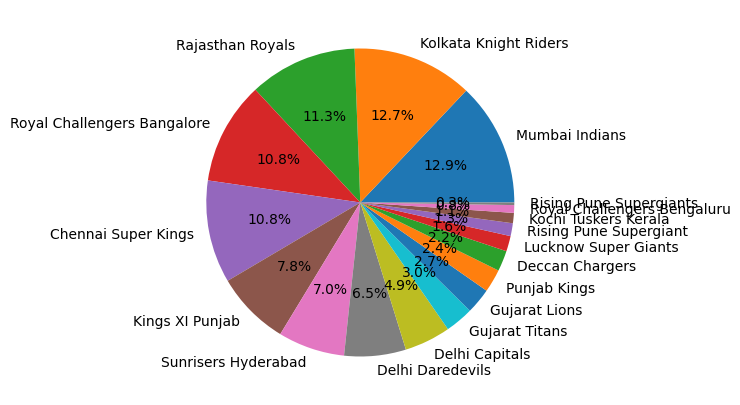

In [60]:
# Create a pie chart of teams, won after batting second
plt.figure(figsize=(5,5))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys()), autopct='%0.1f%%' )
plt.show()

In [62]:
# Number of matches played each season
ipl['season'].value_counts()

season
2013       76
2023       74
2012       74
2022       74
2011       73
2024       71
2018       60
2021       60
2020/21    60
2019       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: count, dtype: int64

In [63]:
# Number of matches played in each city
ipl['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: count, dtype: int64

In [67]:
ipl.shape

(1095, 20)

In [66]:
# Get how many times team has won the match after winning the toss
np.sum(ipl['toss_winner'] == ipl['winner'])

554

In [70]:
# Get percentage of winning, almost 50% toss does not matter here
(554/1095)*100

50.593607305936075

### Import deliveries, means ball to ball data

In [71]:
deliveries = pd.read_csv('deliveries.csv')

In [72]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [74]:
# Get unique matches
deliveries['match_id'].unique()

array([ 335982,  335983,  335984, ..., 1426310, 1426311, 1426312])

In [75]:
deliveries.shape

(260920, 17)

In [80]:
match1 = deliveries[deliveries['match_id'] == 335982]

In [81]:
match1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [85]:
match1.shape

(225, 17)

In [84]:
kkr = match1[match1['inning'] ==1]

In [86]:
kkr.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [89]:
kkr['batsman_runs'].value_counts()

batsman_runs
0    45
1    39
4    15
6    14
2    11
Name: count, dtype: int64

In [90]:
kkr['dismissal_kind'].value_counts()

dismissal_kind
caught    3
Name: count, dtype: int64

In [93]:
# check inning 1
rcb = match1[match1['inning'] == 2]

In [95]:
rcb['batsman_runs'].value_counts()

batsman_runs
0    65
1    27
2     3
6     3
4     3
Name: count, dtype: int64

In [96]:
rcb['dismissal_kind'].value_counts()

dismissal_kind
caught     6
bowled     3
run out    1
Name: count, dtype: int64